In [10]:
# 10.2.1 Задача 1
# Упростите выражение:

# c(sqrt(1), sqrt(2), sqrt(3))

# Создайте последовательность 2 способами (-1, -0.75, -0.5, …, 0.75, 1).
from math import sqrt

import numpy as np

src = np.sqrt(np.array([1, 2, 3]))

print(src)

seq1 = np.arange(-1, 1.25, 0.25)
seq2 = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]

[1.         1.41421356 1.73205081]


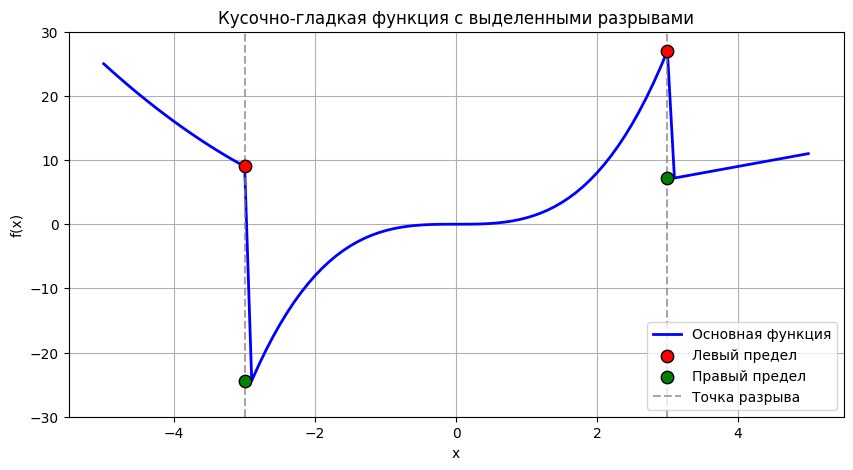

In [1]:
# Упражнение 24.2 Построить график (Глава C.2) кусочно-гладкой функции (Глава 6.12.1) используя функцию ifelse()

# f(x) = x**2, x <= -3
#        x**3, -3 <= x <= 3
#        2*x + 1.3 <= x
#
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5.1, 0.1)

second_and_third_conditions = np.where(x <= 3, x**3, 2*x + 1)

f = np.where(x <= -3, x**2, second_and_third_conditions)

f[(x == -3) | (x == 3)] = np.nan

plt.figure(figsize=(10, 5))
plt.plot(x, f, color='blue', linewidth=2, label='Основная функция')

break_points = [-3, 3]
colors = ['red', 'green']

for point in break_points:
    left_limit = x[x < point][-1]  # Последнее значение слева от точки
    left_value = f[x == left_limit][0]
    plt.scatter(point, left_value, color=colors[0], s=80, zorder=5, 
                edgecolors='black', label='Левый предел' if point == -3 else "")
    
    right_limit = x[x > point][0]  # Первое значение справа от точки
    right_value = f[x == right_limit][0]
    plt.scatter(point, right_value, color=colors[1], s=80, zorder=5,
                edgecolors='black', label='Правый предел' if point == -3 else "")

plt.vlines(break_points, ymin=-30, ymax=30, colors='gray', 
           linestyles='dashed', alpha=0.7, label='Точка разрыва')
plt.title('Кусочно-гладкая функция с выделенными разрывами')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(-30, 30)
plt.legend()
plt.show()


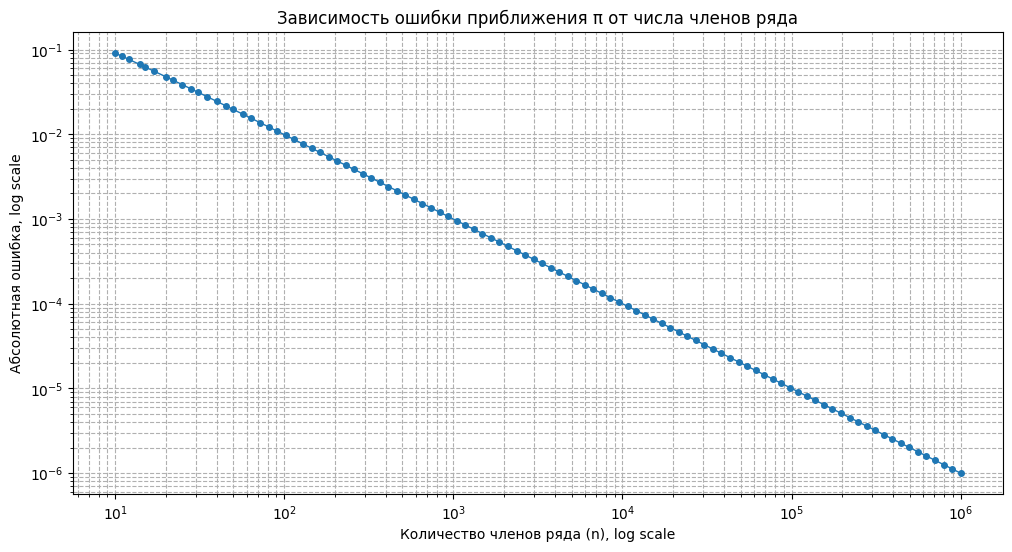

In [2]:

# Упражнение 24.3 С помощью ряда Лейбница можно получить значение числа п. Данный ряд сходится очень медленно. 
# pi = sum i = 0 to n ((- 1) ^ i)/(2i + 1) 
# Использовав по максимуму векторные (Глава 6.9) операции рассчитайте для различных и от n = 10 до n = 10 ^ 10 
# 1. число п и его ошибку 
# 2. постройте график (Глава С.2) ошибки от п


import numpy as np
import matplotlib.pyplot as plt
import math

n_values = np.unique(np.logspace(1, 6, num=100, dtype=np.int64))  # До 10⁶ для демонстрации

errors = []
for n in n_values:
    i = np.arange(n + 1)
    terms = (-1)**i / (2*i + 1) 
    pi_approx = 4 * np.sum(terms)
    errors.append(abs(pi_approx - math.pi))

plt.figure(figsize=(12, 6))
plt.loglog(n_values, errors, marker='o', markersize=4, linestyle='-', linewidth=1)
plt.title('Зависимость ошибки приближения π от числа членов ряда')
plt.xlabel('Количество членов ряда (n), log scale')
plt.ylabel('Абсолютная ошибка, log scale')
plt.grid(True, which='both', linestyle='--')
plt.show()

In [3]:
alphabet = map(chr, range(ord("a"), ord("z")))
print([i for i in alphabet])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


In [4]:
########## Library #############
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)
########## Library #############


import random

import numpy as np

num_matrices = 5 
matrices = np.array([
    [
        [random.randint(1, 10) for _ in range(2)],  # Первая строка
        [random.randint(1, 10) for _ in range(2)]   # Вторая строка
    ]
    for _ in range(num_matrices)
])

with printoptions(precision=3, suppress=True):
    print(matrices)

# (2, 2)
elements_22 = np.array([])
for matrix in matrices:
    elements_22 = np.append(elements_22, matrix[1][1])  # Индексация [строка][столбец]

# 3.(1,1) и (1,2)
vector_11_12 = np.array([])
for matrix in matrices:
    vector_11_12 = np.append(vector_11_12, matrix[0][0:2])

with printoptions(precision=3, suppress=True):
    print("Список элементов (2,2):", elements_22)
    print("Вектор (1,1) и (1,2):", vector_11_12)

[[[10  6]
  [ 2  7]]

 [[ 3  9]
  [10  7]]

 [[ 7  6]
  [ 3  5]]

 [[ 8  3]
  [ 6  2]]

 [[ 2  2]
  [ 8  7]]]
Список элементов (2,2): [7. 7. 5. 2. 7.]
Вектор (1,1) и (1,2): [10.  6.  3.  9.  7.  6.  8.  3.  2.  2.]


In [5]:
# Упражнение 24.6  

# создайте пятимерный массив и заполните его целыми числами.
# преобразуйте его как список массивов размерности 4.
# преобразуйте его как список списков массивов размерности 3.


import numpy as np

five_dim_array = np.random.randint(0, 100, size=(2, 3, 4, 5, 6))

list_4d = [five_dim_array[i] for i in range(five_dim_array.shape[0])]

list_of_lists_3d = [
    [five_dim_array[i, j] for j in range(five_dim_array.shape[1])] 
    for i in range(five_dim_array.shape[0])
]

with printoptions(precision=3, suppress=True):
    print("Исходный массив:", five_dim_array.shape)      
    print("Первый элемент 4D списка:", list_4d[0].shape)    
    print("Первый элемент 3D структуры:", list_of_lists_3d[0][0].shape) 

Исходный массив: (2, 3, 4, 5, 6)
Первый элемент 4D списка: (3, 4, 5, 6)
Первый элемент 3D структуры: (4, 5, 6)


In [6]:
# Упражнение 24.7 Решить СЛАУ (Глава 8.3) 
#  встроенным методом (Глава A.3). Элементы матриц сгенерировать произвольно

import numpy as np

n = 3  
A = np.random.randint(-10, 10, size=(n, n)) 
b = np.random.randint(-10, 10, size=(n,))  

if np.linalg.det(A) == 0:
    raise ValueError("Матрица вырожденная")

x = np.linalg.solve(A, b)

residual = np.linalg.norm(A @ x - b)  # Норма невязки

with printoptions(precision=3, suppress=True):
    print("Матрица коэффициентов:\n", A)
    print("\nВектор свободных членов:\n", b)
    print("\nРешение системы:\n", x)
    print("\nНорма невязки:", residual)

Матрица коэффициентов:
 [[ 3 -5 -6]
 [ 6  0  1]
 [ 8 -8 -7]]

Вектор свободных членов:
 [ 0 -4 -4]

Решение системы:
 [-0.516  0.774 -0.903]

Норма невязки: 8.881784197001252e-16


In [12]:
import numpy as np

n = 3
np.random.seed(42)

A = np.random.rand(n, n)
B = np.random.rand(n, n)

def check_properties(A, B, tol=1e-6):
    results = {}
    
    # 1. (A + B)^T = A^T + B^T
    results[1] = np.allclose((A + B).T, A.T + B.T, rtol=tol, atol=tol)
    
    # 2. (AB)^T = B^T A^T
    results[2] = np.allclose((A @ B).T, B.T @ A.T, rtol=tol, atol=tol)
    
    # 3. det(A) = det(A^T)
    results[3] = np.isclose(np.linalg.det(A), np.linalg.det(A.T), rtol=tol, atol=tol)
    
    # 4. det(AB) = det(A)det(B)
    det_AB = np.linalg.det(A @ B)
    det_A_det_B = np.linalg.det(A) * np.linalg.det(B)
    results[4] = np.isclose(det_AB, det_A_det_B, rtol=tol, atol=tol)
    
    # 5. det(A^{-1}) = 1/det(A) (только для обратимой A)
    try:
        A_inv = np.linalg.inv(A)
        results[5] = np.isclose(np.linalg.det(A_inv), 1/np.linalg.det(A), rtol=tol, atol=tol)
    except np.linalg.LinAlgError:
        results[5] = "A singular"
    
    # 6. (AB)^{-1} = B^{-1}A^{-1} (только для обратимых A и B)
    try:
        AB_inv = np.linalg.inv(A @ B)
        B_inv_A_inv = np.linalg.inv(B) @ np.linalg.inv(A)
        results[6] = np.allclose(AB_inv, B_inv_A_inv, rtol=tol, atol=tol)
    except np.linalg.LinAlgError:
        results[6] = "Matrix singular"
    
    # 7. (A - B)^{-1} = A^{-1} + A^{-1}B(A - B)^{-1} (условно)
    try:
        A_minus_B = A - B
        lhs = np.linalg.inv(A_minus_B)
        A_inv = np.linalg.inv(A)
        rhs = A_inv + A_inv @ B @ np.linalg.inv(A_minus_B)
        results[7] = np.allclose(lhs, rhs, rtol=tol, atol=tol)
    except np.linalg.LinAlgError:
        results[7] = "Matrix singular"
    
    return results

properties = check_properties(A, B)

with printoptions(precision=3, suppress=True):
    print(f"Матрица A:\n{A}\n")
    print(f"Матрица B:\n{B}\n")
    for prop, result in properties.items():
        print(f"Свойство {prop}: {'Выполнено' if result == True else 'Не выполнено' if result is False else result}")

Матрица A:
[[0.375 0.951 0.732]
 [0.599 0.156 0.156]
 [0.058 0.866 0.601]]

Матрица B:
[[0.708 0.021 0.97 ]
 [0.832 0.212 0.182]
 [0.183 0.304 0.525]]

Свойство 1: Выполнено
Свойство 2: Выполнено
Свойство 3: Выполнено
Свойство 4: Выполнено
Свойство 5: Выполнено
Свойство 6: Выполнено
Свойство 7: Выполнено


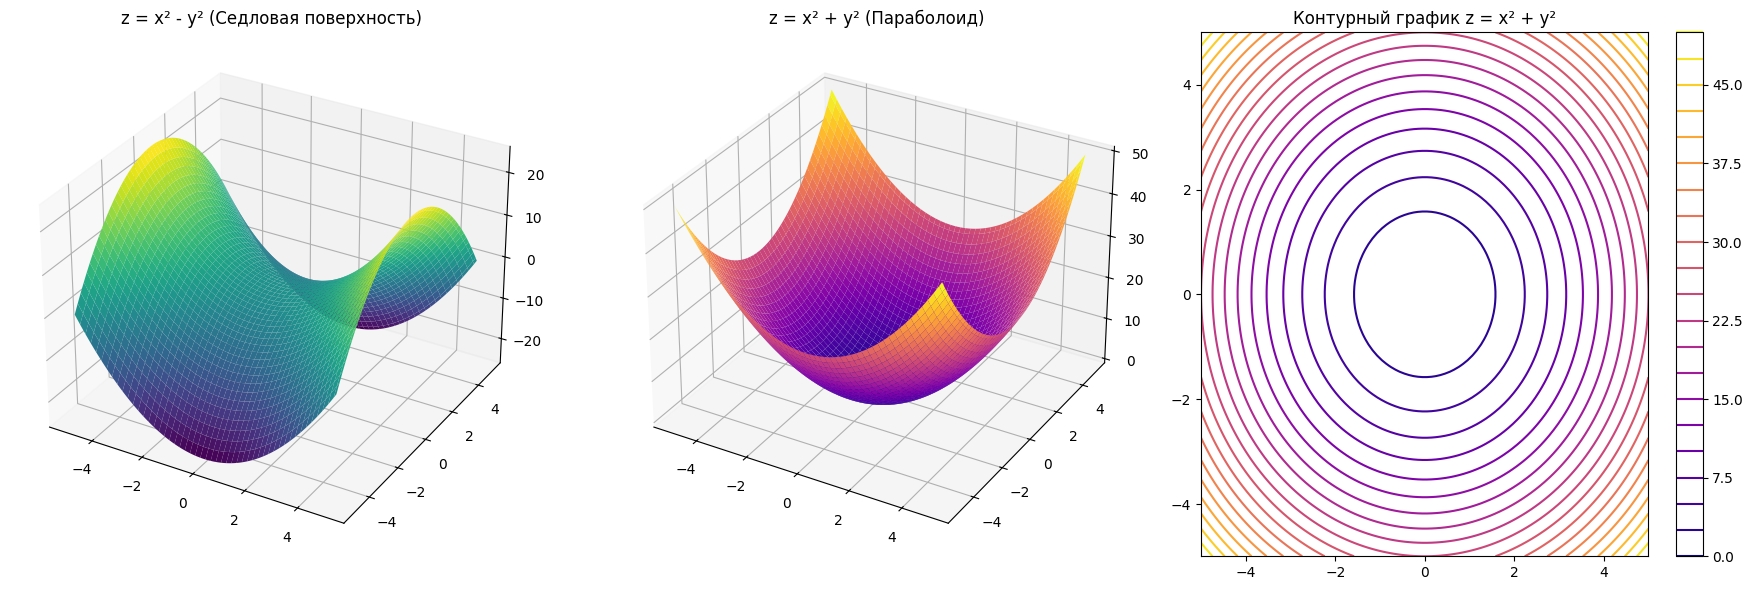

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z1 = X**2 - Y**2  # Гиперболический параболоид
Z2 = X**2 + Y**2   # Эллиптический параболоид

fig = plt.figure(figsize=(18, 6))

# 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('z = x² - y² (Седловая поверхность)')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='plasma')
ax2.set_title('z = x² + y² (Параболоид)')

ax3 = fig.add_subplot(133)
contour = ax3.contour(X, Y, Z2, levels=20, cmap='plasma')
ax3.set_title('Контурный график z = x² + y²')
plt.colorbar(contour)

plt.tight_layout()
plt.show()

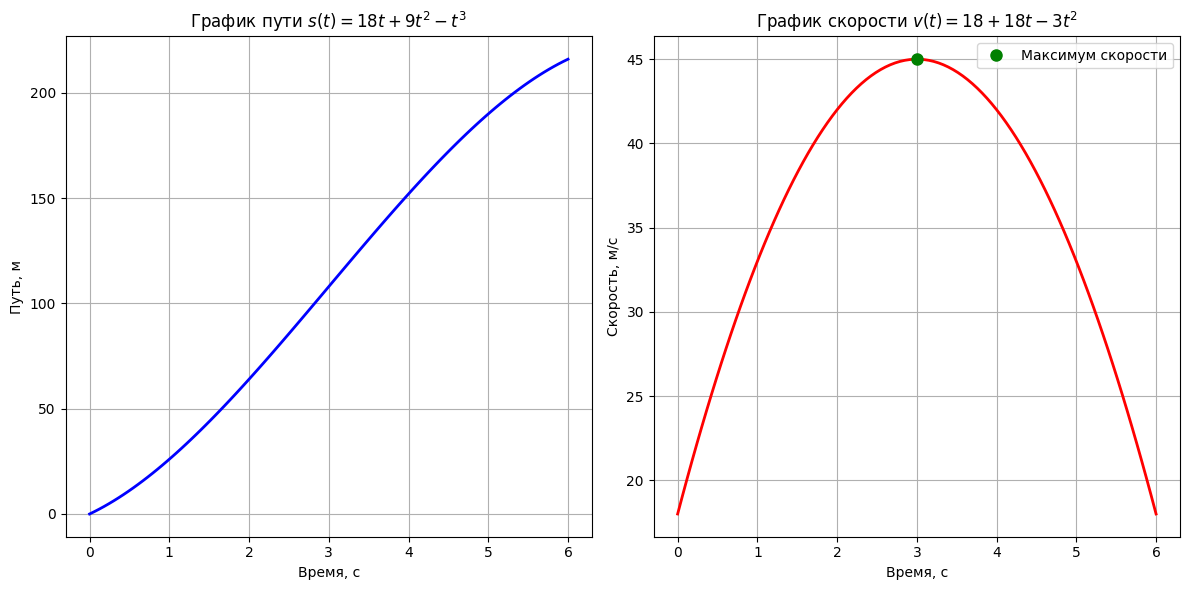

In [13]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 6, 100)

s = 18*t + 9*t**2 - t**3

v = 18 + 18*t - 3*t**2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, s, 'b-', linewidth=2)
plt.title('График пути $s(t) = 18t + 9t^2 - t^3$')
plt.xlabel('Время, с')
plt.ylabel('Путь, м')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v, 'r-', linewidth=2)
plt.plot(3, 45, 'go', markersize=8, label='Максимум скорости')
plt.title('График скорости $v(t) = 18 + 18t - 3t^2$')
plt.xlabel('Время, с')
plt.ylabel('Скорость, м/с')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

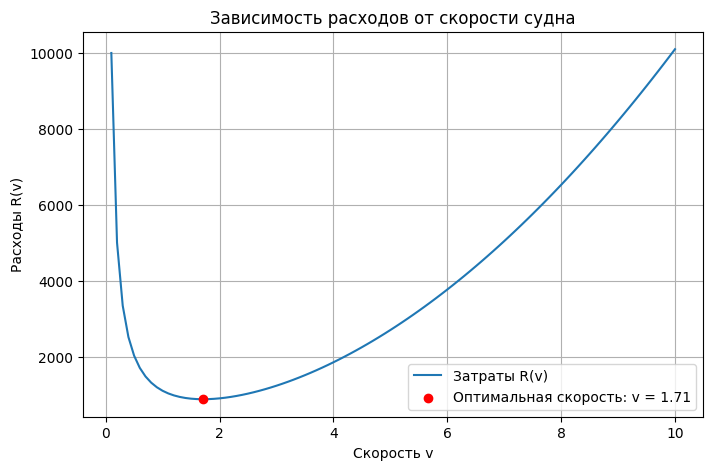

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 10
k = 1
l = 100 

def cost_function(v, a, k, l):
    return (l * a) / v + k * l * v**2

v_values = np.linspace(0.1, 10, 100)
cost_values = cost_function(v_values, a, k, l)

v_opt = (a / (2 * k)) ** (1/3)
min_cost = cost_function(v_opt, a, k, l)

plt.figure(figsize=(8, 5))
plt.plot(v_values, cost_values, label='Затраты R(v)')
plt.scatter(v_opt, min_cost, color='red', zorder=5, label=f'Оптимальная скорость: v = {v_opt:.2f}')
plt.xlabel('Скорость v')
plt.ylabel('Расходы R(v)')
plt.title('Зависимость расходов от скорости судна')
plt.legend()
plt.grid(True)
plt.show()

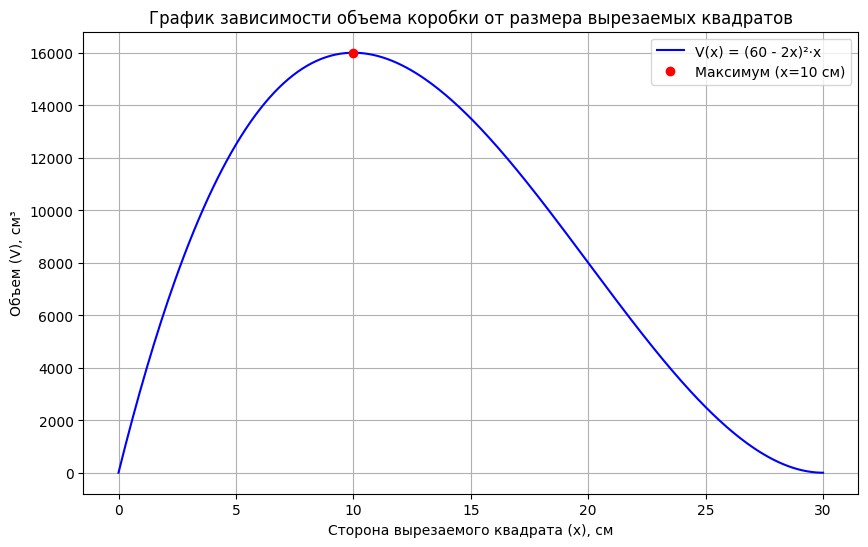

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 60
x = np.linspace(0, 30, 300)

V = (a - 2*x)**2 * x

plt.figure(figsize=(10, 6))
plt.plot(x, V, 'b-', label='V(x) = (60 - 2x)²·x')
plt.plot(10, (60 - 2*10)**2 * 10, 'ro', label='Максимум (x=10 см)')
plt.title('График зависимости объема коробки от размера вырезаемых квадратов')
plt.xlabel('Сторона вырезаемого квадрата (x), см')
plt.ylabel('Объем (V), см³')
plt.grid(True)
plt.legend()
plt.show()

Точка пересечения: (1.67, 0.67)
Прямые параллельны
Прямые совпадают


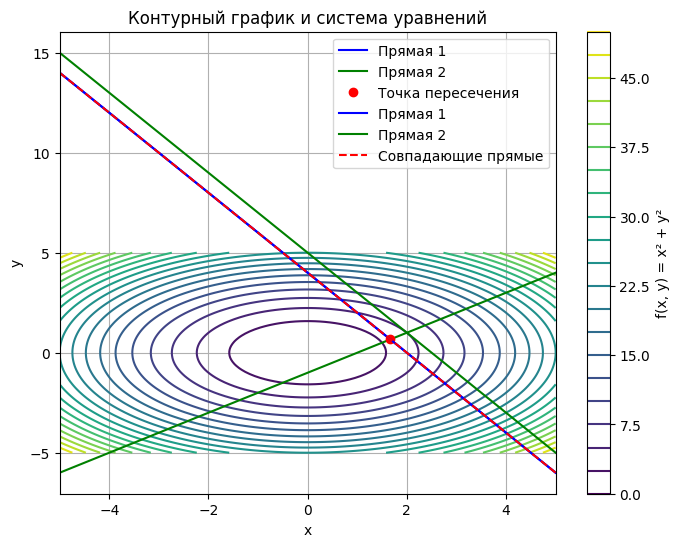

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функция f(x, y)
def f(x, y):
    return x**2 + y**2

# Создание сетки данных
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение контурного графика
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='f(x, y) = x² + y²')

# Функция для построения линий системы уравнений
def plot_system(A, b, case):
    # Проверка определителя
    det = np.linalg.det(A)
    if det == 0:
        # Проверка на совпадение прямых
        if np.allclose(A[0]/A[1], b[0]/b[1]):
            print("Прямые совпадают")
            x_vals = np.linspace(-5, 5, 100)
            y_vals = (b[0] - A[0,0]*x_vals) / A[0,1]
            plt.plot(x_vals, y_vals, 'r--', label='Совпадающие прямые')
        else:
            print("Прямые параллельны")
            x_vals = np.linspace(-5, 5, 100)
            y_vals1 = (b[0] - A[0,0]*x_vals) / A[0,1]
            y_vals2 = (b[1] - A[1,0]*x_vals) / A[1,1]
            plt.plot(x_vals, y_vals1, 'b-', label='Прямая 1')
            plt.plot(x_vals, y_vals2, 'g-', label='Прямая 2')
    else:
        # Решение системы
        solution = np.linalg.solve(A, b)
        print(f"Точка пересечения: ({solution[0]:.2f}, {solution[1]:.2f})")
        x_vals = np.linspace(-5, 5, 100)
        y_vals1 = (b[0] - A[0,0]*x_vals) / A[0,1]
        y_vals2 = (b[1] - A[1,0]*x_vals) / A[1,1]
        plt.plot(x_vals, y_vals1, 'b-', label='Прямая 1')
        plt.plot(x_vals, y_vals2, 'g-', label='Прямая 2')
        plt.plot(solution[0], solution[1], 'ro', label='Точка пересечения')

# Примеры систем уравнений
# Случай 1: Пересекающиеся прямые
A1 = np.array([[2, 1], [1, -1]])
b1 = np.array([4, 1])
plot_system(A1, b1, "Пересекающиеся прямые")

# Случай 2: Параллельные прямые
A2 = np.array([[2, 1], [2, 1]])
b2 = np.array([4, 5])
plot_system(A2, b2, "Параллельные прямые")

# Случай 3: Совпадающие прямые
A3 = np.array([[2, 1], [4, 2]])
b3 = np.array([4, 8])
plot_system(A3, b3, "Совпадающие прямые")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Контурный график и система уравнений')
plt.show()

In [ ]:
import sympy as sp

def f(*equations):
    x, y = sp.symbols('x y')
    eqs = []
    
    for eq_str in equations:
        if eq_str.count('~') != 1:
            raise ValueError(f"Некорректное уравнение: '{eq_str}'")
        left, right = eq_str.split('~', 1)
        eq = sp.Eq(sp.sympify(left), sp.sympify(right))
        eqs.append(eq)
    
    solution = sp.solve(eqs, (x, y), dict=True)
    
    if not solution:
        # Проверка на параллельность или противоречивость
        A = sp.Matrix([[eq.lhs.coeff(x), eq.lhs.coeff(y)] for eq in eqs])
        b = sp.Matrix([[eq.rhs - eq.lhs.subs({x: 0, y: 0})] for eq in eqs])
        augmented = A.row_join(b)
        
        if A.rank() < augmented.rank():
            return "Система противоречива (нет решений)"
        elif A.rank() == augmented.rank() < len(eqs):
            return "Система имеет бесконечно много решений"
    return solution

if __name__ == "__main__":
    print("Случай 1:", f("2*x + 3*y ~ 0", "2*x ~ 3*y + 1"))
    
    print("Случай 2:", f("2*x + y ~ 4", "2*x + y ~ 5"))
    
    print("Случай 3:", f("2*x + y ~ 4", "4*x + 2*y ~ 8"))

Случай 1: [{x: 1/4, y: -1/6}]
Случай 2: Система противоречива (нет решений)
Случай 3: [{x: 2 - y/2}]
